In [1]:
from __future__ import print_function 
from optimisation import min_max_df, my_g, opt_with_starts
from itertools import cycle
from model_scoring_func import my_sound
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set(font_scale=1.5)
sns.set_style('ticks')
sns.set_style('ticks', {'font.family': 'Cambria'})

In [3]:
con_list = ['rheomix stability_time_min',
            'rheomix final_deg_time_min',
            'tensile E_t_MPa',
            'tensile epsilon_break_%',
            'tensile sigma_break_MPa',
#             'LOI Final'
            'ConeCal MARHE_kW_m2',
            'ConeCal peak_HRR_kWpm2'
           ]

In [4]:
min_max_df(con_list)

,max,min
name,,
rheomix stability_time_min,141.400000,8.500000
rheomix final_deg_time_min,346.900000,12.600000
tensile E_t_MPa,1917.675000,23.640000
tensile epsilon_break_%,114.773333,9.817500
tensile sigma_break_MPa,29.512500,10.606667
ConeCal MARHE_kW_m2,179.159015,12.098409
ConeCal peak_HRR_kWpm2,242.755583,60.003085


In [5]:
con_limits = [10.0, 80.0, 300.0, 50.0, 18.0, 85.0, 125.0]

In [78]:
ingr_cost = [15.0, 8.0, 48.0, 45.0, 30.0, 40.0, 14.0]

In [79]:
cons = ({'type': 'eq',
         'fun': lambda x: sum(x) - 1},
        {'type': 'ineq', 
         'fun': my_g, 
         'args': [con_list, con_limits]})

In [80]:
bnds = [[0.0, 1.0] for i in range(7)]
bnds[0] = [0.4, 0.8]

In [81]:
# vary = range(0, 46, 2)

vary = [i/2.0 for i in range(10*2, 20*2 + 1)]
print(vary)

[10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0]


In [82]:
fs = []
xs = []

In [83]:
for i in vary:
    print('---------------')
    print(i)
#     con_limits[1] = i
    ingr_cost[5] = i
    
#     if i <= 150:
#         continue
    
    best_res = opt_with_starts(ingr_cost, bnds, cons)
    
    fs.append(best_res.fun)
    xs.append(best_res.x)
    
my_sound()

---------------
10.0
22.6888601062
Optimization terminated successfully.
20.6461498478
Optimization terminated successfully.
20.6461504044
Optimization terminated successfully.
20.6461518819
Optimization terminated successfully.
20.6461501343
Optimization terminated successfully.
---------------
10.5
22.6105052915
Optimization terminated successfully.
20.6858293583
Optimization terminated successfully.
20.6858293551
Optimization terminated successfully.
20.6858293551
Optimization terminated successfully.
20.6858293551
Optimization terminated successfully.
---------------
11.0
20.7433727314
Optimization terminated successfully.
20.7255093446
Optimization terminated successfully.
20.743372731
Optimization terminated successfully.
20.7971048087
Optimization terminated successfully.
20.7255088631
Optimization terminated successfully.
---------------
11.5
20.7651883724
Optimization terminated successfully.
22.6888616969
Optimization terminated successfully.
20.7810338776
Optimization termin

In [72]:
xs = map(list, zip(*xs))

In [73]:
ingredients = ['PVC', 'Filler', 'FR', 'Stabiliser', 'DINP', 'LDH', 'Sph. Filler']

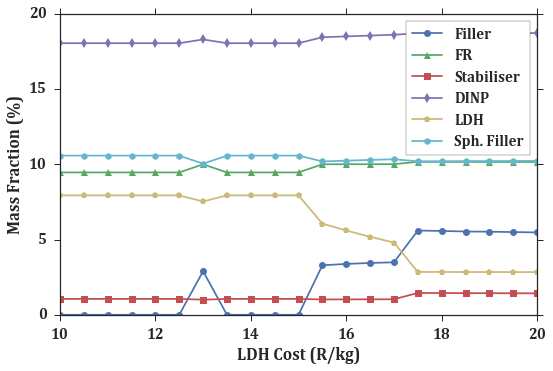

In [77]:
markers = ['-o', '-^', '-s', '-d', '-p', '-h', '-*']
m_cycle = cycle(markers)

fig_x = figure()
show = [1, 2, 3, 4, 5, 6]

for x, l in zip([xs[i] for i in show], 
                [ingredients[i] for i in show]):
    x100 = [j*100 for j in x]
    plot(vary, x100, next(m_cycle), label=l)

legend(frameon=True)
# legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel('LDH Cost (R/kg)')
ylabel('Mass Fraction (%)')

tight_layout()
# fig_x.savefig('Sens_LDH_Cost.pdf')

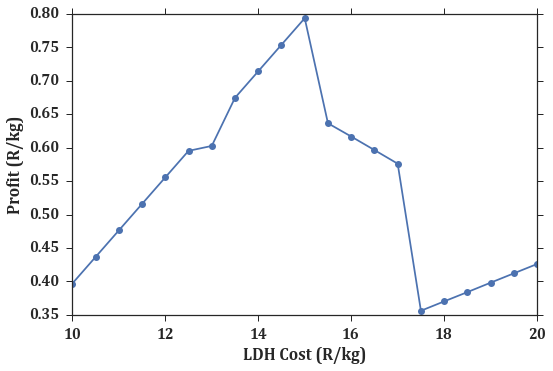

In [75]:
figP = figure()
plot(vary, [i*(j - 5) for i, j in zip(xs[5],vary)], '-o')

xlabel('LDH Cost (R/kg)')
ylabel('Profit (R/kg)')

tight_layout()
figP.savefig('Sens_LDH_Cost_Prof.pdf')

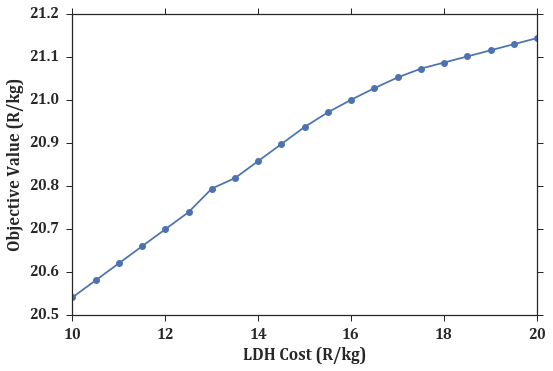

In [76]:
figf = figure()
plot(vary, fs, '-o')
xlabel('LDH Cost (R/kg)')
ylabel('Objective Value (R/kg)')

tight_layout()
# figf.savefig('Sens_LDH_Cost_Obj.pdf')